In [1]:
import numpy as np
import xarray as xr
import pandas as pd 
import matplotlib.pyplot as plt

In [111]:
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_b_change_flat.nc")
tf =int(5*2*np.pi/10**(-4)) #314159
# ocean_data2 = ocean_data.sel(time=slice("0",str(tf)))

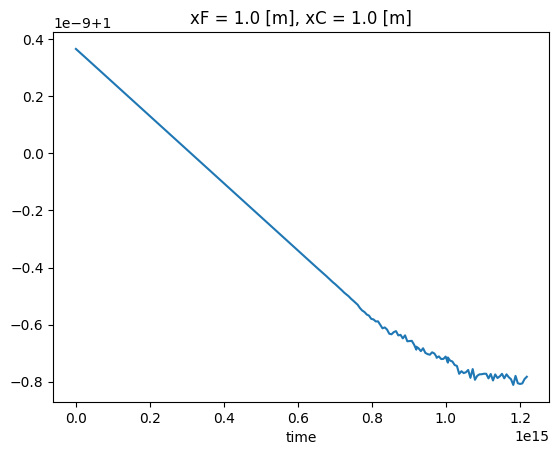

In [115]:
dot_prod = np.square((ocean_data["u"]).mean(dim=["yC","zC"]))+np.square((ocean_data["v"]).mean(dim=["yF","zC"]))+np.square(ocean_data["w"].mean(dim=["yC","zF"]))
KE = 0.5*dot_prod
KE_5 = KE.isel(time=51)
KE_new=KE/KE_5
# dt = (KE["time"].dt.seconds[1]-KE["time"].dt.seconds[0]).to_numpy()
# KE_DT = (KE[1:].to_numpy()-KE[:-1].to_numpy())/(dt)
# KE_DT_norm =KE_DT/KE[1:]
# KE_dt = KE[1:]-KE[0:-1]
# KE_norm = KE/KE[0]
# plt.plot(ocean_data.time/1e9*(10**(-4)/(2*np.pi)),KE_DT)
# KE_DT_norm.plot()
KE_new.plot()
# plt.yscale("log")